In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\\visual studio code\Python\Student_Performance.csv")

# EDA

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.duplicated().value_counts()

False    9873
True      127
dtype: int64

In [7]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [14]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

<AxesSubplot:>

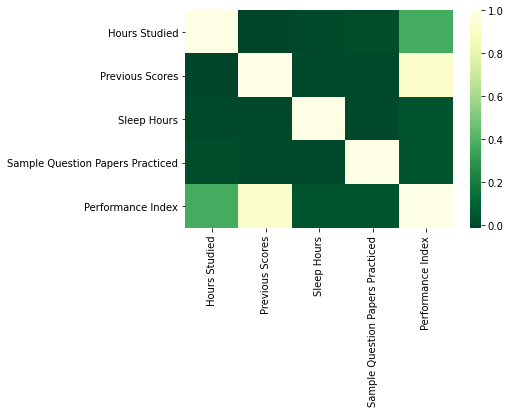

In [15]:
sns.heatmap(df.corr(),cmap='YlGn_r')

([<matplotlib.patches.Wedge at 0x1412667a430>,
 [Text(-0.017969208902882738, 1.099853220903319, 'No'),
  Text(0.017969311878573032, -1.0998532192209152, 'Yes')],
 [Text(-0.009801386674299674, 0.5999199386745375, '50.5%'),
  Text(0.009801442842858017, -0.5999199377568628, '49.5%')])

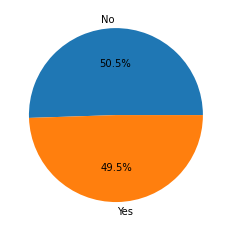

In [26]:
plt.pie(df["Extracurricular Activities"].value_counts(),labels=df["Extracurricular Activities"].value_counts().index,autopct='%1.1f%%')

In [20]:
df["Extracurricular Activities"].value_counts()

No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64

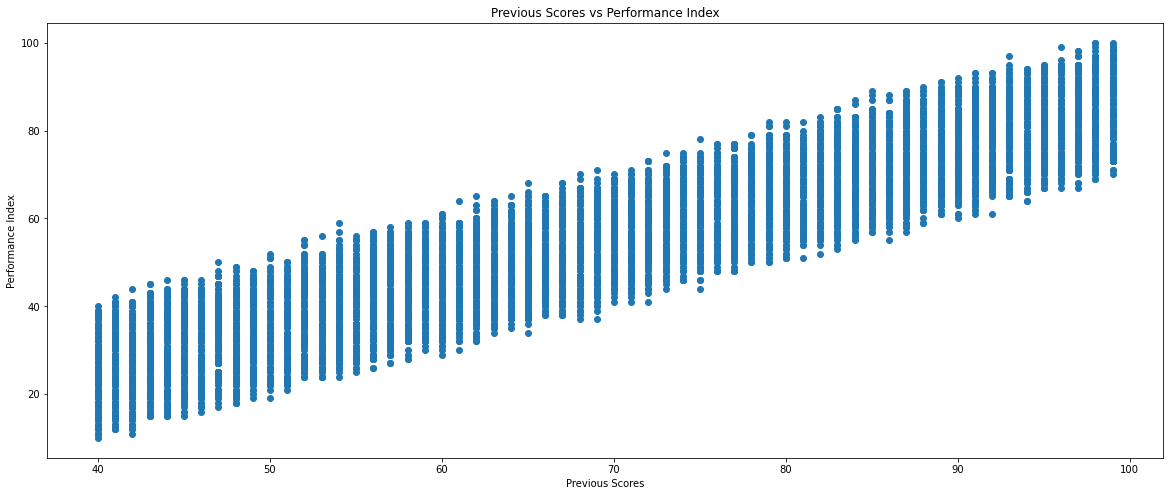

In [44]:
# Previous Scores vs Performance Index

prev_sc=df['Previous Scores']
pfm_index = df['Performance Index']

plt.figure(figsize=(20,8))
plt.scatter(prev_sc,pfm_index)
plt.xlabel("Previous Scores")
plt.ylabel('Performance Index')
plt.title("Previous Scores vs Performance Index")
plt.show()

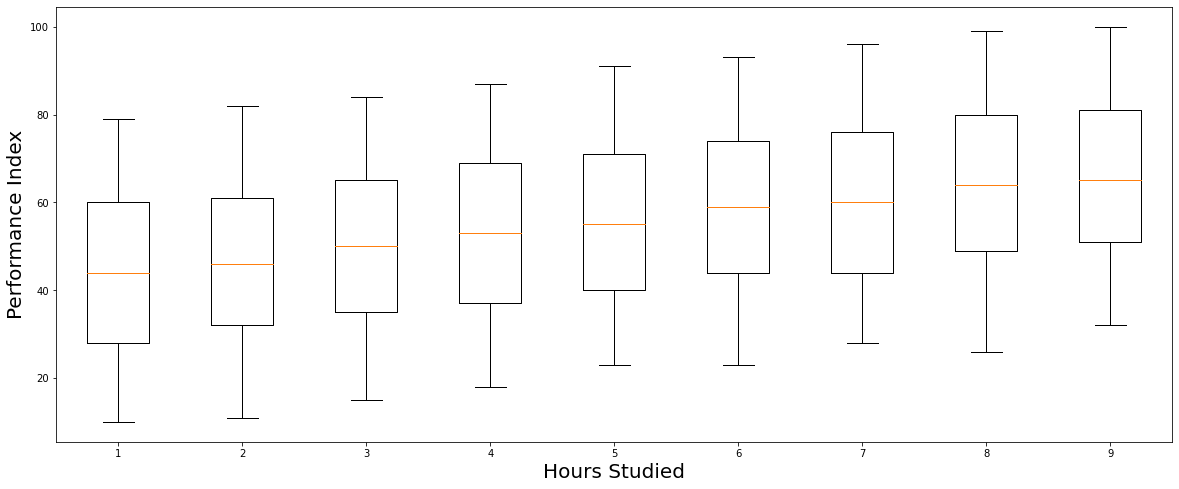

In [12]:
# Hours Studied vs Performance Index
hrs_arr=[[] for i in range(1,10)]
for i in range(0,9):
    hr_df = df[df["Hours Studied"]==i+1]
    hrs_arr[i]=hr_df["Performance Index"].tolist()
    
labels=[i for i in range(1,10)]

plt.figure(figsize=(20,8))
plt.boxplot(hrs_arr,labels=labels)
plt.xlabel("Hours Studied",fontsize=20)
plt.ylabel('Performance Index',fontsize=20)

plt.show()

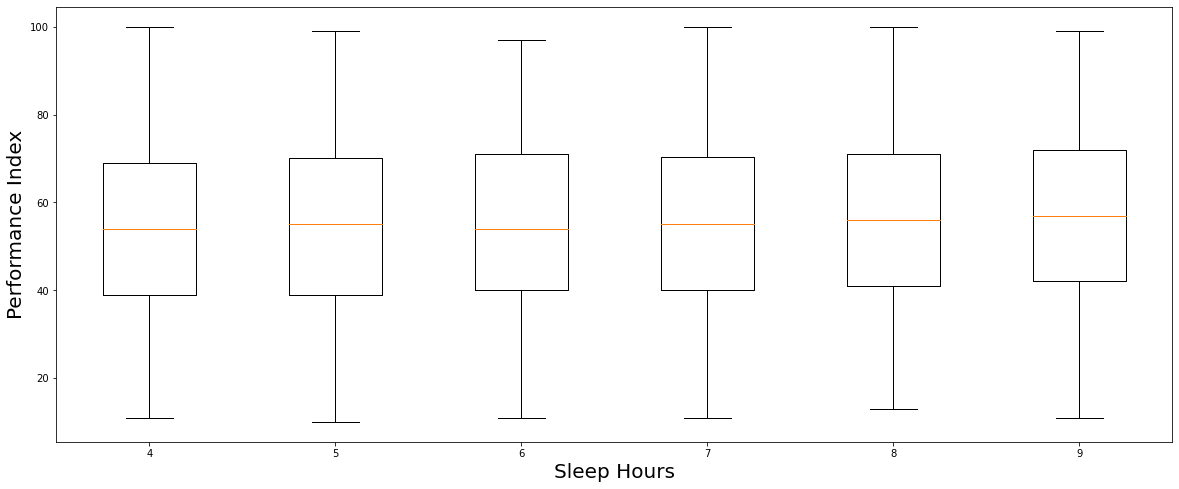

In [23]:
# Sleep Hours	 vs Performance Index

slp_hrs_arr=[[] for i in range(0,6)]
for i in range(0,6):
    slp_hr_df = df[df["Sleep Hours"]==i+4]
    slp_hrs_arr[i]=slp_hr_df["Performance Index"].tolist()
    
labels=[i for i in range(4,10)]

plt.figure(figsize=(20,8))
plt.boxplot(slp_hrs_arr,labels=labels)
plt.xlabel("Sleep Hours",fontsize=20)
plt.ylabel('Performance Index',fontsize=20)

plt.show()

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
cols=[0,1,2,3,4]

new_df = df.replace(to_replace="Yes",value=1)
new_df=new_df.replace(to_replace="No",value=0)
X=new_df[df.columns[cols]].values
Y=new_df[df.columns[5]].values

X=X.reshape(-1,5)


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [14]:
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=model.predict(x_test)
y_pred

array([54.11381941, 52.94403838, 73.52292067, ..., 31.98957547,
       63.68763315, 43.97834763])

In [16]:
mse = mean_squared_error(y_test,y_pred)

print("Mean square error : ",mse)

Mean square error :  3.9982390189667485


In [18]:
r_score = r2_score(y_test,y_pred)
print("R2 square : ",r_score)

R2 square :  0.9891481760733325


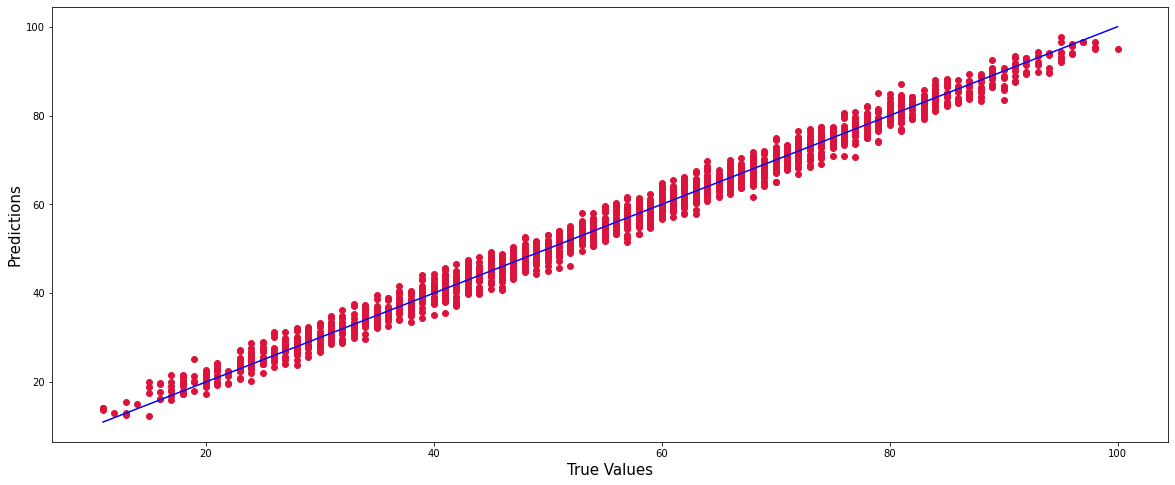

In [21]:
plt.figure(figsize=(20,8))
plt.scatter(y_test,y_pred,c='crimson')

p1=max(max(y_test),max(y_pred))
p2=min(min(y_test),min(y_pred))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()